# *Business Background and Motivation*

#### **What does Ctrip do?**

Ctrip aggregates information on hotels, flights, and tours; makes reservations and obtains tickets for clients; and generates revenue through commissions from hotels, airlines, and tour operators. At the time of the experiment the company was worth **$5** billion and it was the largest travel agency in China


#### **Does WFH work and how to assess that?**

- Real estate prices were increasing significantly in Shanghai, so managers at Ctrip decided to consider the idea of allowing the employees from the call center in Shanghai to work from home

- Managers at Ctrip wanted to achieve two things with the WFH policy: Reduce office rental costs and reduce the high attrition rates the firm was experiencing. However, they were concerned about the level of productivity and efficacy of the employees in the WFH setting.

- Given all that, senior management decided to run a **randomized controlled trial**. The trial would run for 9 months.

- Who participates? They asked the 998 employees in the airfare and hotel call centers departments of the Shanghai call center **whether they would be interested in working from home four days a week, with the fifth one in the office**. Approximately half of the employees (503) were interested, particularly those who had less education and tenure, their own room, and longer commutes. Out of the 503 employees interested, only 249 were qualified to participate in the experiment by virtue of having a long enough tenure (6 months or more), broadband access, and a private room at home where they could work.

- After a lottery draw, those with even-numbered birthday were assigned to work from home, and those with odd-numbered birthdays stayed in the office acting as the control group. All tasks and working hours remained the same for both the control and treatment group, the only location between the two groups was the work location.

#### **About the Experiment**

- There were four jobs (hotel and airline) involved in the experiment:

    1. Order Takers: anwser customer calls, took orders and entered them in the system.
    2. Order Placers: Dealt with the airlines and hotels and notified the clients
    3. Order Correctors: who resolved problems such as a flight being canceled
    4. Night Shift: that both placed and corrected orders




#### **Results**

- The performance of the home workers went up dramatically, increasing 13% over the 9 months of the experiment. This improvement came mainly from a 9% increase in the number of minutes they worked during their shifts (the time they were logged in to take calls). The remaining 4% came from the increased number of calls per minute worked.

- Attrition fell sharply among the WFH employees, dropping by 50% versus the control group




<br><br>











# *Importing the data*

In [34]:
import os
import os.path
import time
from datetime import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import tensorflow as tf
import cvxpy as cp

tf.keras.utils.set_random_seed(42)

import warnings

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
os.getcwd()

'/content'

In [36]:
images_path = '/content/drive/Shareddrives/Experimentation_Causal_Inference_Project/Images'
data_path = '/content/drive/Shareddrives/Experimentation_Causal_Inference_Project/Data'

In [37]:
# clean data
data = pd.read_csv(os.path.join(data_path, 'work_from_home', 'clean', 'wfh_tidy_person.csv'))
data_week = pd.read_csv(os.path.join(data_path, 'work_from_home', 'clean', 'wfh_tidy_personweek_p.csv'))

# raw data
perform_during_exp_df = pd.read_stata(os.path.join(data_path, 'work_from_home', 'raw', 'performance_during_exper.dta')) #performance_during_exper.dta
quit_df = pd.read_stata(os.path.join(data_path, 'work_from_home', 'raw', 'quit_data.dta'))
tc_comparison_df = pd.read_stata(os.path.join(data_path, 'work_from_home', 'raw', 'tc_comparison.dta'))


# bloom data
wage_wfh_df = pd.read_stata(os.path.join(data_path, 'work_from_home', 'Bloom', 'WFH','wage_wfh.dta'))
wage_new_df = pd.read_stata(os.path.join(data_path, 'work_from_home', 'Bloom', 'WFH','wage_new.dta'))
treatment_effect_df = pd.read_stata(os.path.join(data_path, 'work_from_home', 'Bloom', 'WFH', 'treatment_effect.dta'))
tc_comparison_df = pd.read_stata(os.path.join(data_path, 'work_from_home', 'Bloom', 'WFH', 'tc_comparison.dta'))
switch_return_df = pd.read_stata(os.path.join(data_path, 'work_from_home', 'Bloom', 'WFH', 'switch_return.dta'))
switch_gohome_df = pd.read_stata(os.path.join(data_path, 'work_from_home', 'Bloom', 'WFH', 'switch_gohome.dta'))
summary_volunteer_df = pd.read_stata(os.path.join(data_path, 'work_from_home', 'Bloom', 'WFH', 'summary_volunteer.dta'))
selection_df = pd.read_stata(os.path.join(data_path, 'work_from_home', 'Bloom', 'WFH', 'selection.dta'))
selection_new_df = pd.read_stata(os.path.join(data_path, 'work_from_home', 'Bloom', 'WFH', 'selection_new.dta'))
satisfaction_df = pd.read_stata(os.path.join(data_path, 'work_from_home', 'Bloom', 'WFH', 'satisfaction.dta'))
recording_df = pd.read_stata(os.path.join(data_path, 'work_from_home', 'Bloom', 'WFH', 'recording.dta'))
quit_data_df = pd.read_stata(os.path.join(data_path, 'work_from_home', 'Bloom', 'WFH', 'quit_data.dta'))
promotion_df = pd.read_stata(os.path.join(data_path, 'work_from_home', 'Bloom', 'WFH', 'promotion.dta'))
post_sep_home_df = pd.read_stata(os.path.join(data_path, 'work_from_home', 'Bloom', 'WFH', 'post_sep_home.dta'))
positive_df = pd.read_stata(os.path.join(data_path, 'work_from_home', 'Bloom', 'WFH', 'positive.dta'))
performance_during_exper_df = pd.read_stata(os.path.join(data_path, 'work_from_home', 'Bloom', 'WFH', 'performance_during_exper.dta'))
perform_top_bottom_df = pd.read_stata(os.path.join(data_path, 'work_from_home', 'Bloom', 'WFH', 'perform_top_bottom.dta'))
negative_df = pd.read_stata(os.path.join(data_path, 'work_from_home', 'Bloom', 'WFH', 'negative.dta'))
exhaustion_df = pd.read_stata(os.path.join(data_path, 'work_from_home', 'Bloom', 'WFH', 'exhaustion.dta'))
daysathome_df = pd.read_stata(os.path.join(data_path, 'work_from_home', 'Bloom', 'WFH', 'daysathome.dta'))
conversion_df = pd.read_stata(os.path.join(data_path, 'work_from_home', 'Bloom', 'WFH', 'conversion.dta'))
attrition_df = pd.read_stata(os.path.join(data_path, 'work_from_home', 'Bloom', 'WFH', 'attrition.dta'))


pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# *EDA*

##About the variables

- **treatment**: whether the person is in the treatment group or not
- **ordertaker**: number of orders taken
- **type**: worker type, workers with the same job
- **quitjob**: quit firm during 8 months of experiment
- **age**: worker's age
- **costofcommute**: cost of commute in yuan

- **ordertakers** key performance indicator was phone calls answered and number of orders taken
  - when the ordertaker column is True, you'll see data in the phonecalls0 and phonecalls1 columns
  - the ordertaker is true to job type 1 only

- **phonecalls0:** it is the sum of the total number of phone calls made divided by 1000 in the weeks prior to the beginning of the experiment

- **phonecalls1:** it is the sum of the total number of phone calls made divided by 1000 in the weeks prior to the beginning of the experiment


<br><br>

- ordertakers key performance indicator was phone calls answered and number of orders taken
  - when the ordertaker column is True, you'll see data in the phonecalls0 and phonecalls1 columns
  - the ordertaker is true to job type 1 only

- phonecalls0: it is the sum of the length of all the phone calls collected over the 49 prior to the start of the experiment

- phonecalls1: it is the sum of the length of all the phone calls collected over throughout the experiment

- For worker type 1, the variable of interest was phonecalls0 and phonecalls1. For the other type of workers, we'll use perform10 and perform11

In [ ]:
data.head()

,personid,treatment,ordertaker,type,quitjob,age,costofcommute,children,male,married,perform10,perform11,prior_experience,tenure,basewage,bonus,grosswage,ageyoungestchild,rental,bedroom,second_technical,high_school,tertiary_technical,university,internet,phonecalls0,phonecalls1
0,3906,1,False,2,0,33,8.0,1,0,1,0.084573,0.308620,84.0,96.0,1883.333374,713.444458,2737.546631,10,0,1,0,1,0,0,1,0.000,0.000
1,4122,1,True,1,0,30,18.0,0,0,0,0.000450,0.700559,0.0,94.0,1700.000000,2097.222168,4096.245605,0,0,0,0,1,0,0,1,21.335,21.797
2,4448,0,False,2,0,35,10.0,1,0,1,0.455910,0.488662,0.0,92.0,1750.000000,2153.333252,4269.296387,11,0,1,0,1,0,0,1,0.000,0.000
3,4942,1,False,4,0,27,20.0,0,0,1,0.918510,-0.275367,0.0,82.0,1900.000000,3043.000000,5295.395508,0,0,1,1,0,0,0,1,0.000,0.000
4,5018,1,False,4,0,29,15.0,1,0,1,-0.377443,-0.606368,0.0,82.0,2138.888916,464.333344,1387.589966,0,0,1,1,0,0,0,1,0.000,0.000


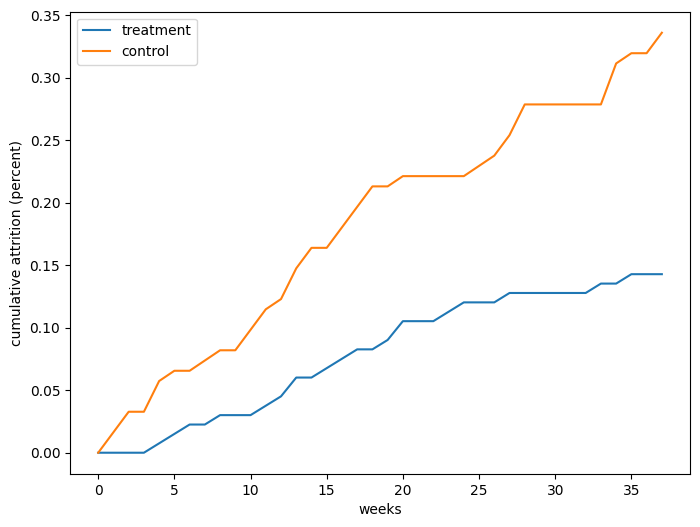

In [ ]:
attrition_rate_per_week = (attrition_df[attrition_df['quitjob'] == 1].groupby(['expgroup','week'])['personid'].count() / attrition_df.groupby(['expgroup','week'])['personid'].count()).reset_index()
attrition_rate_per_week.rename(columns={'personid': 'attrition_rate'}, inplace=True)
attrition_rate_per_week['attrition_rate'].fillna(0, inplace=True)
attrition_rate_per_week['attrition_cumulative_sum'] = attrition_rate_per_week.groupby('expgroup')['attrition_rate'].cumsum()

# Attrition rate per week, treatment vs control
plt.figure(figsize=(8, 6))
plt.plot(attrition_rate_per_week[attrition_rate_per_week['expgroup'] == 1]['week'], attrition_rate_per_week[attrition_rate_per_week['expgroup'] == 1]['attrition_cumulative_sum'], label='treatment')
plt.plot(attrition_rate_per_week[attrition_rate_per_week['expgroup'] == 0]['week'], attrition_rate_per_week[attrition_rate_per_week['expgroup'] == 0]['attrition_cumulative_sum'], label='control')
plt.xlabel('weeks')
plt.ylabel('cumulative attrition (percent)')
plt.legend();

# *Table 1, Factors of why a person volunteers to WFH, Probit and Marginal effects*
---



*Notes. The regressions are all probits at the individual level of the decision to work from home. Marginal effects calculated at the mean are reported. The total sample covers all Ctrip employees in their Shanghai airfare and hotel departments. Willingness to participate was based on the initial survey in November 2010. Employees were not told the eligibility rules in advance of the survey (own room, 6+ months tenure, broadband Internet connect). Robust standard errors are reported. *** denotes 1% significance, ** 5% significance, * 10% significance The pseudo R-squared for the table rises from 0.0042 in column (1) to 0.033 in column (7), highlighting how most volunteering to WFH was unpredicted by demographic characteristics.
aThe coefficients and standard errors have both been multiplied by 100 for scaling purposes.*




In [ ]:
summary_volunteer_df
#tenure: how many months has the person been in the company
#commute: in minutes --> time it takes to go to the office

,personid,age,tenure,grosswage,children,bedroom,commute,men,married,volunteer,high_educ
0,3224,30.0,113.0,3.824882,no,no,40.0,1.0,0.0,0.0,0.0
1,3906,33.0,96.0,2.737547,yes,yes,180.0,0.0,1.0,1.0,0.0
2,4118,31.0,94.0,3.460380,yes,no,180.0,0.0,1.0,0.0,1.0
3,4122,30.0,94.0,4.096246,no,no,180.0,0.0,0.0,0.0,0.0
4,4164,28.0,25.0,7.253200,no,yes,65.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
989,48138,26.0,0.0,1.125520,no,no,40.0,1.0,0.0,0.0,1.0
990,48372,24.0,0.0,0.620690,no,yes,50.0,0.0,0.0,1.0,0.0
991,48378,18.0,0.0,0.620690,no,yes,160.0,1.0,0.0,0.0,0.0
992,48382,22.0,0.0,0.620690,no,no,80.0,1.0,0.0,0.0,0.0


In [ ]:
summary_volunteer_df['high_educ'].value_counts()

high_educ
0.0    579
1.0    415
Name: count, dtype: int64

In [ ]:
summary_volunteer_df['children'] = np.where(summary_volunteer_df['children'] == 'yes', 1, 0)
summary_volunteer_df['bedroom'] = np.where(summary_volunteer_df['bedroom'] == 'yes', 1, 0)
summary_volunteer_df

,personid,age,tenure,grosswage,children,bedroom,commute,men,married,volunteer,high_educ
0,3224,30.0,113.0,3.824882,0,0,40.0,1.0,0.0,0.0,0.0
1,3906,33.0,96.0,2.737547,1,1,180.0,0.0,1.0,1.0,0.0
2,4118,31.0,94.0,3.460380,1,0,180.0,0.0,1.0,0.0,1.0
3,4122,30.0,94.0,4.096246,0,0,180.0,0.0,0.0,0.0,0.0
4,4164,28.0,25.0,7.253200,0,1,65.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
989,48138,26.0,0.0,1.125520,0,0,40.0,1.0,0.0,0.0,1.0
990,48372,24.0,0.0,0.620690,0,1,50.0,0.0,0.0,1.0,0.0
991,48378,18.0,0.0,0.620690,0,1,160.0,1.0,0.0,0.0,0.0
992,48382,22.0,0.0,0.620690,0,0,80.0,1.0,0.0,0.0,0.0


In [ ]:
summary_volunteer_df['children'].value_counts()

children
0    910
1     84
Name: count, dtype: int64

In [ ]:
summary_volunteer_df.corr()

,personid,age,tenure,grosswage,children,bedroom,commute,men,married,volunteer,high_educ
personid,1.000000,-0.493085,-0.967383,-0.720037,-0.231025,-0.013708,-0.102253,0.072870,-0.260938,0.084756,-0.131003
age,-0.493085,1.000000,0.503016,0.365134,0.460895,0.263882,0.235299,0.148337,0.501899,-0.002172,0.260004
tenure,-0.967383,0.503016,1.000000,0.669580,0.253903,0.011665,0.127176,-0.065803,0.272151,-0.086407,0.098173
grosswage,-0.720037,0.365134,0.669580,1.000000,0.132568,-0.044100,-0.034030,-0.015770,0.161731,-0.035747,0.158650
children,-0.231025,0.460895,0.253903,0.132568,1.000000,0.201299,0.220568,0.022225,0.720683,0.068676,0.043490
bedroom,-0.013708,0.263882,0.011665,-0.044100,0.201299,1.000000,0.332099,0.206443,0.266178,0.122941,0.012849
commute,-0.102253,0.235299,0.127176,-0.034030,0.220568,0.332099,1.000000,0.100494,0.207818,0.106656,-0.098374
men,0.072870,0.148337,-0.065803,-0.015770,0.022225,0.206443,0.100494,1.000000,0.009372,0.041150,0.030456
married,-0.260938,0.501899,0.272151,0.161731,0.720683,0.266178,0.207818,0.009372,1.000000,0.067988,0.070522
volunteer,0.084756,-0.002172,-0.086407,-0.035747,0.068676,0.122941,0.106656,0.041150,0.067988,1.000000,-0.089788


In [ ]:
#we apply a probit regression

In [ ]:
#Table 1 replication:
import statsmodels.api as sm

target = 'volunteer'
features = 'children'

X = summary_volunteer_df[features]
y = summary_volunteer_df[target]

# Fit the probit model
probit_model = sm.Probit(y, X)
probit_results = probit_model.fit()

# Compute the marginal effects at the mean
marginal_effects = probit_results.get_margeff(at='mean')
marginal_effects_summary = marginal_effects.summary()

# Print the summary of the marginal effects and probit results
print(probit_results.summary())
print("\n"+ "+"*80 + "\n")
print(marginal_effects_summary)


Optimization terminated successfully.
         Current function value: 0.690729
         Iterations 4
                          Probit Regression Results                           
Dep. Variable:              volunteer   No. Observations:                  994
Model:                         Probit   Df Residuals:                      993
Method:                           MLE   Df Model:                            0
Date:                Wed, 19 Jun 2024   Pseudo R-squ.:                0.003384
Time:                        03:18:53   Log-Likelihood:                -686.58
converged:                       True   LL-Null:                       -688.92
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
children       0.3030      0.139      2.179      0.029       0.030       0.576

++++++++++++++++++++++++++++

In [ ]:
#Loop to run all the list of features

### Probit regression and marginal effects

In [ ]:
import statsmodels.api as sm

# Define the target and different sets of independent variables
target = 'volunteer'
feature_sets = [
    ['children'],
    ['married'],
    ['children', 'married', 'commute', 'bedroom'],
    ['children', 'married', 'commute', 'bedroom', 'high_educ', 'tenure'],
    ['children', 'married', 'commute', 'bedroom', 'high_educ', 'tenure', 'grosswage'],
    ['grosswage'],
    ['children', 'married', 'commute', 'bedroom', 'high_educ', 'tenure', 'grosswage', 'men']
]

# Assuming summary_volunteer_df is your dataframe
for features in feature_sets:
    X = summary_volunteer_df[features]
    y = summary_volunteer_df[target]

    # Add a constant to the model
    X = sm.add_constant(X)

    # Fit the probit model
    probit_model = sm.Probit(y, X)
    probit_results = probit_model.fit()

    # Compute the marginal effects at the mean
    marginal_effects = probit_results.get_margeff(at='mean')
    marginal_effects_summary = marginal_effects.summary()

    # Print the summary of the marginal effects and probit results
    print(f"Model with features: {features}")
    print(probit_results.summary())
    print("\n" + "+"*80 + "\n")
    print(marginal_effects_summary)
    print("\n" + "#"*80 + "\n")



Optimization terminated successfully.
         Current function value: 0.690693
         Iterations 4
Model with features: ['children']
                          Probit Regression Results                           
Dep. Variable:              volunteer   No. Observations:                  994
Model:                         Probit   Df Residuals:                      992
Method:                           MLE   Df Model:                            1
Date:                Wed, 19 Jun 2024   Pseudo R-squ.:                0.003435
Time:                        03:18:54   Log-Likelihood:                -686.55
converged:                       True   LL-Null:                       -688.92
Covariance Type:            nonrobust   LLR p-value:                   0.02958
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0110      0.042     -0.265      0.791      -0.092       0

## Analysis and questions:

**1. Why does Ctrip choose 4 days a week from home and one in the office?**
⏰

**2. Why are we using a probit regression instead of a liner one?**
Probit regression model is utilized when the dependent variable can only take binary values (volunteer or not volunteer, 0 or 1).

**- What does the summary of the table of the probit_results mean?**
Each coefficient represents the estimated change in the probability of the dependent variable associated with a one-unit change in the predictor variable, holding other variables constant.
*One unit increase in children will augment the probablity of volunteering % to wfh.*

**3. What are the marginal effects of the mean and why do we need to compute them?**

Marginal effects represent the change in the probability of the dependent variable associated with a one-unit change in the predictor variable, taking into account the ***nonlinearity*** of the probit model.

Calculating the marginal effect at the mean is a common practice because it provides an estimate of the average effect of the predictor variable across the sample. This means that the marginal effect represents the change in the probability of volunteering associated with a one-unit change in the number of children, holding other variables at their mean values.

Coefficients from Probit Regression Results: The coefficients from the probit regression represent the estimated effect of each predictor variable on the latent variable (i.e., the linear combination of predictors) in the probit model. These coefficients are on the scale of the linear predictor and indicate the change in the z-score of the latent variable associated with a one-unit change in the predictor, assuming all other variables are held constant. In your example, the coefficient for "children" is 0.3140, indicating the change in the latent variable's z-score associated with a one-unit change in the number of children.

Marginal Effects (dy/dx) from Marginal Effect Table: The marginal effects represent the change in the probability of the dependent variable (volunteering) associated with a one-unit change in the predictor variable. Unlike the coefficients from the probit regression, which are on the scale of the latent variable, marginal effects are on the scale of the probability. They provide a more directly interpretable measure of the impact of each predictor on the probability of the outcome. In your example, the marginal effect of "children" is 0.1253, indicating the change in the probability of volunteering associated with a one-unit change in the number of children.

So, while the coefficient from the probit regression tells you about the change in the latent variable, the marginal effect tells you about the change in the probability of the outcome variable. They provide complementary information and are used for different purposes in interpreting the results of the probit regression model.

**4. Why do the coeff , std error, dy/dx, etc. change when I make a loop?** ⏰

Because for the loop I added a constant which is used for:

Capturing baseline: value of the dependant when all predictors are 0.

Improving model fit: ?

Avoiding bias: ?

Interpretation: ?



**5. There are 3 ways of doing marginal effects, why is Bloom choosing at the mean?**

Each observation in your data is going to have a different marginal effect depeding on their index value. --> so we calculate different type of marginal effects:

a. Marginal effect of a representative: pick a set of variables (values) for a individual and calculate the marginal effect. (woman who are .... specific features).

b. Average marginal effect: calculate each individual marginal effect and calculate the average.

c. **Marginal effect at the mean**: calculate the mean of your independent variables, then get the marginal effect for some hypothetical observation with all those mean values. --> its the easiest and quickest, it generalizes all the features into a mean.



**6. Is there a potential mechanism in our example?, if so, which?** ⏰

**7.Why do they take 9 months to run the test? Is their a delayed effect?** ⏰

**8.Average effects in subgroups: Could we do an ATET differentiating people who volunteered vs. people who did not volunteer? (in a potential new treatment).** ⏰

## Pending:

- Compact the loop into one table
- Describe the results of the table
- Prupose further questions

# *Table 2, The performance impact of WFH, Panel data*




*Notes. The regressions are run at the individual by week level (except column (7), which is run at the monthly level), with a full set of individual and week (month) fixed effects. Experiment*treatment is the interaction of the period of the experimentation (December 6, 2010, until August 14, 2011) by an individual having an even birthdate (2nd, 4th, 6th, etc. day of the month).*

#### **Modeling WFH Decisions**

the impact of WFH on profit was modeled using the following four effect:

1. Hours
2. Call rate
3. Attrition
4. Capital


#### **Profit per Employee**

To highlight these, we consider the firm’s profit per worker as a function of the fraction of the work-week spent at home, denoted θ $\in$ [0, 1]. Initially, we will assume that if a positive level of θ is selected (WFH is implemented),

H: The number of hours an employee works per week. This is determined by subtracting the time spent on breaks (B) from the nominal shift length of 40 hours.

c: The quality-adjusted number of calls an employee produces per hour worked.
v: The unit value of each call to the firm.

f: The fixed base salary paid to the employee.

w: The per-call piece rate paid to the employee.

t: The recruitment and training costs incurred by the firm if an employee quits.

a: The probability of an employee quitting.

k: The office space required for the call center.

r: The rental rate for the office space.



```
profit_per_worker =  vH(θ)c(θ) - f - wH(θ)c(θ) - ta(θ) - rk(θ)

In [ ]:
data_week

,personid,year_week,experiment_time,treatment,phonecalls
0,28560,201001.0,0.0,0.0,NaN
1,26906,201001.0,0.0,0.0,NaN
2,31888,201001.0,0.0,0.0,0.109
3,16424,201001.0,0.0,0.0,0.252
4,6364,201001.0,0.0,0.0,NaN
...,...,...,...,...,...
18746,36032,201133.0,1.0,1.0,0.449
18747,43286,201133.0,1.0,1.0,NaN
18748,13530,201133.0,1.0,1.0,NaN
18749,23228,201133.0,1.0,1.0,0.585


*NOTE: Our result might differ from the table 2 because we do not know who dropped the treatment (there is imperfect compliance).*

In [38]:
perform_during_exp_df

,personid,year_week,expgroup,perform1,phonecall,phonecallraw,treatment,experiment_treatment,experiment_control,experiment_nantong,homethatweek,experiment_home,logphonecall,logcallpersec,logcalllength,logcall_dayworked,logdaysworked,wage_month,experiment_treatment_commute120,date
0,28560,201001.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.098612,201001.0,0.0,2010-01-01
1,26906,201001.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.098612,201001.0,0.0,2010-01-01
2,31888,201001.0,0.0,-2.248854,-2.287922,109.0,0.0,0.0,0.0,0.0,0.0,0.0,4.691348,-5.144450,9.835797,9.835797,0.000000,201001.0,0.0,2010-01-01
3,16424,201001.0,0.0,-1.629726,-1.283035,252.0,0.0,0.0,0.0,0.0,0.0,0.0,5.529429,-5.027789,10.557218,9.458606,1.098612,201001.0,0.0,2010-01-01
4,6364,201001.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.000000,201001.0,0.0,2010-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112274,106266,201133.0,3.0,-0.818283,-0.547670,419.0,0.0,0.0,0.0,1.0,1.0,1.0,6.037871,-5.296765,11.334636,9.725198,1.609438,201108.0,NaN,NaT
112275,133606,201133.0,3.0,-0.500917,-0.483494,426.0,0.0,0.0,0.0,1.0,1.0,1.0,6.054440,-5.501565,11.556005,9.764245,1.791759,201108.0,NaN,NaT
112276,135692,201133.0,3.0,-0.083297,-0.263459,450.0,0.0,0.0,0.0,1.0,1.0,1.0,6.109248,-5.642017,11.751265,9.959505,1.791759,201108.0,NaN,NaT
112277,105042,201133.0,3.0,1.354708,1.038414,592.0,0.0,0.0,0.0,1.0,1.0,1.0,6.383507,-5.383418,11.766924,10.157486,1.609438,201108.0,NaN,NaT


In [ ]:
print(f"{len(data_week['personid'].unique())=}")
print(f"{len(data_week['year_week'].unique())=}")
print(f"{data_week.shape[0]=}")

len(data_week['personid'].unique())=249
len(data_week['year_week'].unique())=86
data_week.shape[0]=18751


In [7]:
#adding perform 1 from perform_during_exp_df
data_week = pd.merge(
                    data_week,
                    perform_during_exp_df[['personid', 'year_week', 'perform1']],
                    how='left',
                    on=['personid', 'year_week']
                )
data_week

,personid,year_week,experiment_time,treatment,phonecalls,perform1
0,28560,201001.0,0.0,0.0,NaN,NaN
1,26906,201001.0,0.0,0.0,NaN,NaN
2,31888,201001.0,0.0,0.0,0.109,-2.248854
3,16424,201001.0,0.0,0.0,0.252,-1.629726
4,6364,201001.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...
18746,36032,201133.0,1.0,1.0,0.449,0.446691
18747,43286,201133.0,1.0,1.0,NaN,-0.071992
18748,13530,201133.0,1.0,1.0,NaN,-0.025786
18749,23228,201133.0,1.0,1.0,0.585,1.819166


###Regression with fixed effects

In [30]:
import statsmodels.formula.api as smf

# Regression 1: with fixed effects
model1 = smf.ols(formula='perform1 ~ treatment:experiment_time + C(personid) + C(year_week)', data=data_week)
results1 = model1.fit()

print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:               perform1   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     35.57
Date:                Thu, 20 Jun 2024   Prob (F-statistic):               0.00
Time:                        03:35:55   Log-Likelihood:                -21005.
No. Observations:               18044   AIC:                         4.268e+04
Df Residuals:                   17709   BIC:                         4.529e+04
Df Model:                         334                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [31]:
#Performance only during the experiment

data_during_experiment = data_week[data_week['experiment_time'] == 1]

# Regression 2: with fixed effects for the filtered data
model2 = smf.ols(formula='perform1 ~treatment + C(personid) + C(year_week)', data=data_during_experiment)
results2 = model1.fit()

# Print results
print(results2.summary())


                            OLS Regression Results                            
Dep. Variable:               perform1   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     35.57
Date:                Thu, 20 Jun 2024   Prob (F-statistic):               0.00
Time:                        03:36:59   Log-Likelihood:                -21005.
No. Observations:               18044   AIC:                         4.268e+04
Df Residuals:                   17709   BIC:                         4.529e+04
Df Model:                         334                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [32]:
#Phone calls during the entire experiment

# Regression 3: with fixed effects for the filtered data
model3 = smf.ols(formula='phonecalls ~ experiment_time:treatment + C(personid) + C(year_week)', data=data_week)
results3 = model1.fit()

# Print results
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:               perform1   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     35.57
Date:                Thu, 20 Jun 2024   Prob (F-statistic):               0.00
Time:                        03:37:10   Log-Likelihood:                -21005.
No. Observations:               18044   AIC:                         4.268e+04
Df Residuals:                   17709   BIC:                         4.529e+04
Df Model:                         334                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [33]:
#Phone calls during the entire experiment natural log

# Regression 3log: with fixed effects for the filtered data
model3log = smf.ols(formula='np.log(phonecalls) ~ experiment_time:treatment + C(personid) + C(year_week)', data=data_week)
results3log = model1.fit()

# Print results
print(results3log.summary())

                            OLS Regression Results                            
Dep. Variable:               perform1   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     35.57
Date:                Thu, 20 Jun 2024   Prob (F-statistic):               0.00
Time:                        03:37:22   Log-Likelihood:                -21005.
No. Observations:               18044   AIC:                         4.268e+04
Df Residuals:                   17709   BIC:                         4.529e+04
Df Model:                         334                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

###Regressions without fixed effects

In [23]:
# Regression 1.22: without fixed effects
model12 = smf.ols(formula='perform1 ~ treatment:experiment_time', data=data_week)
results12 = model2.fit()

print(results12.summary())

                            OLS Regression Results                            
Dep. Variable:               perform1   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     24.86
Date:                Thu, 20 Jun 2024   Prob (F-statistic):               0.00
Time:                        03:27:22   Log-Likelihood:                -8052.5
No. Observations:                7464   AIC:                         1.667e+04
Df Residuals:                    7179   BIC:                         1.865e+04
Df Model:                         284                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

- Understand table above vs with no dummy variable
- insert compliance and no compliance in this section (look at Austins notebook)
- Look at which tables/problems/subjects can go in here from the book


##Pending

- Understand what a regression means
- Understand why we add cuantative or dummy variables to a regression (multivariate)
- Understand what are fixed effects for
- Replicate table and put it in a better code
- Read chapter 23 and introduce any necessary terms

